# Trực quan hóa với Seaborn

Seaborn là package được xây dựng dựa trên nền của matplotlib, hỗ trợ tốt hơn việc trực quan hóa dữ liệu. Flow trực quan hóa dữ liệu với `seaborn` gần tương đồng với `GGPLOT2` và được tiến hành như sau:

- Chuẩn bị dữ liệu
- Xác định các thuộc tính hình học
- Vẽ biểu đồ
- Customize các yếu tố khác

**Lưu ý**: Trong seaborn có các dataset ví dụ. Tuy nhiên, do các data set này không được lưu sẵn mà lại được load từ github. Do đó, khi bị chặn proxy sẽ không sử dụng được.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
# %matplotlib inline
# Đặt retina resolution
# %config InlineBackend.figure_format = 'retina'
# %config InlineBackend.figure_format = 'retina'
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")
sns.__version__
iris = pd.read_csv("./99_dataset/iris.csv")

In [2]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


:::{note}
Từ phiên bản `0.12`, seaborn cho phép xây dựng biểu đồ thông qua `objects interface`. Đây là cách xây dựng biểu đồ mới, cho phép thực hiện biểu đồ thông qua các layer với các nhóm biểu đồ thông dụng như: bar, line, histogram, dot
:::

## Object interfaces

Với `seaborn` mới, ta có thể viết phần lớn các biểu đồ thông dụng theo cách viết của ngữ pháp biểu đồ với các layers được đặt chồng lấn lên nhau.

Công thức tổng quát dạng đơn giản.

```
so.Plot(data, x, y).add(so.layers())
```

Các methods thường dùng nhất của `sns.objects`:

- `add`: Thêm các layer của biểu đồ. Các loại biểu đồ cơ bản mà `seaborn.objects` hỗ trợ tốt:

    - `so.Bar`: Vẽ biểu đồ bar - tương ứng với geom_bar
    - `so.Area`: Vẽ biểu đồ area - tương ứng với geom_area
    - `so.Text`: Tương ứng với geom_text    
    
- `facet` & `pairs`: Chia nhóm biểu đồ theo trục (tương tự như `facet` trong ggplot2)
- `label`: tên biểu đồ, tên trục & legend.

Các method hỗ trợ khác về tính toán thống kê:

- `so.Agg`: Hàm tính toán mặc định là `mean`, có thể đổi sang các hàm khác khi cần
- `so.Hist`: Đi kèm với bar, dùng để vẽ histogram   

Các method bổ trợ khác:

- `so.Dodge`, `so.Stack`: Đặt vị trí trên của các object, dùng kèm với `bar` hoặc `text`
- `so.scale`: Dùng để scale các trục


### Các layer cơ bản

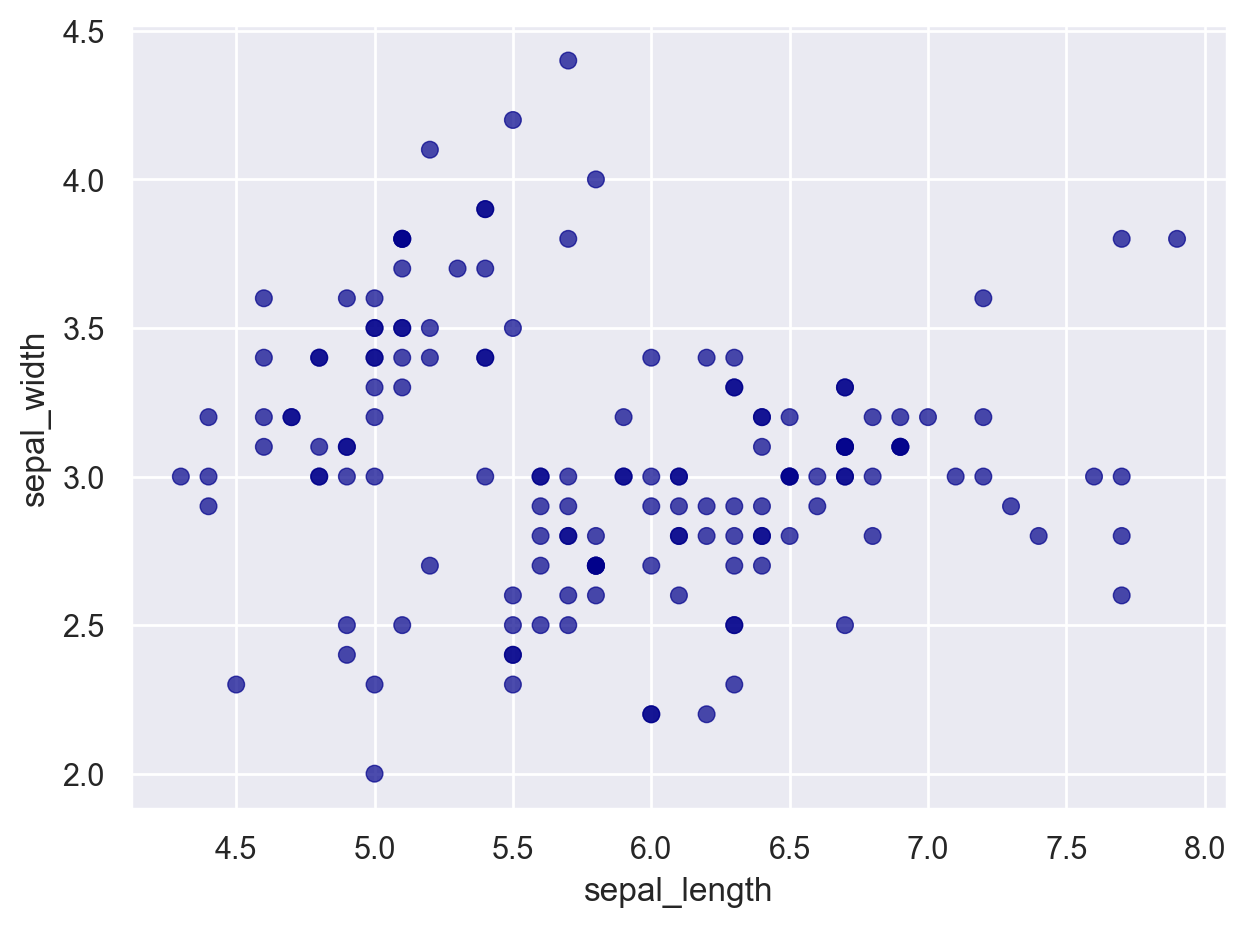

In [3]:
import seaborn.objects as so
sns.set_style("white")
g = so.Plot(iris, x = "sepal_length", y = "sepal_width").add(so.Dot(color = "darkblue", alpha = 0.7))
g.show()

### Facet

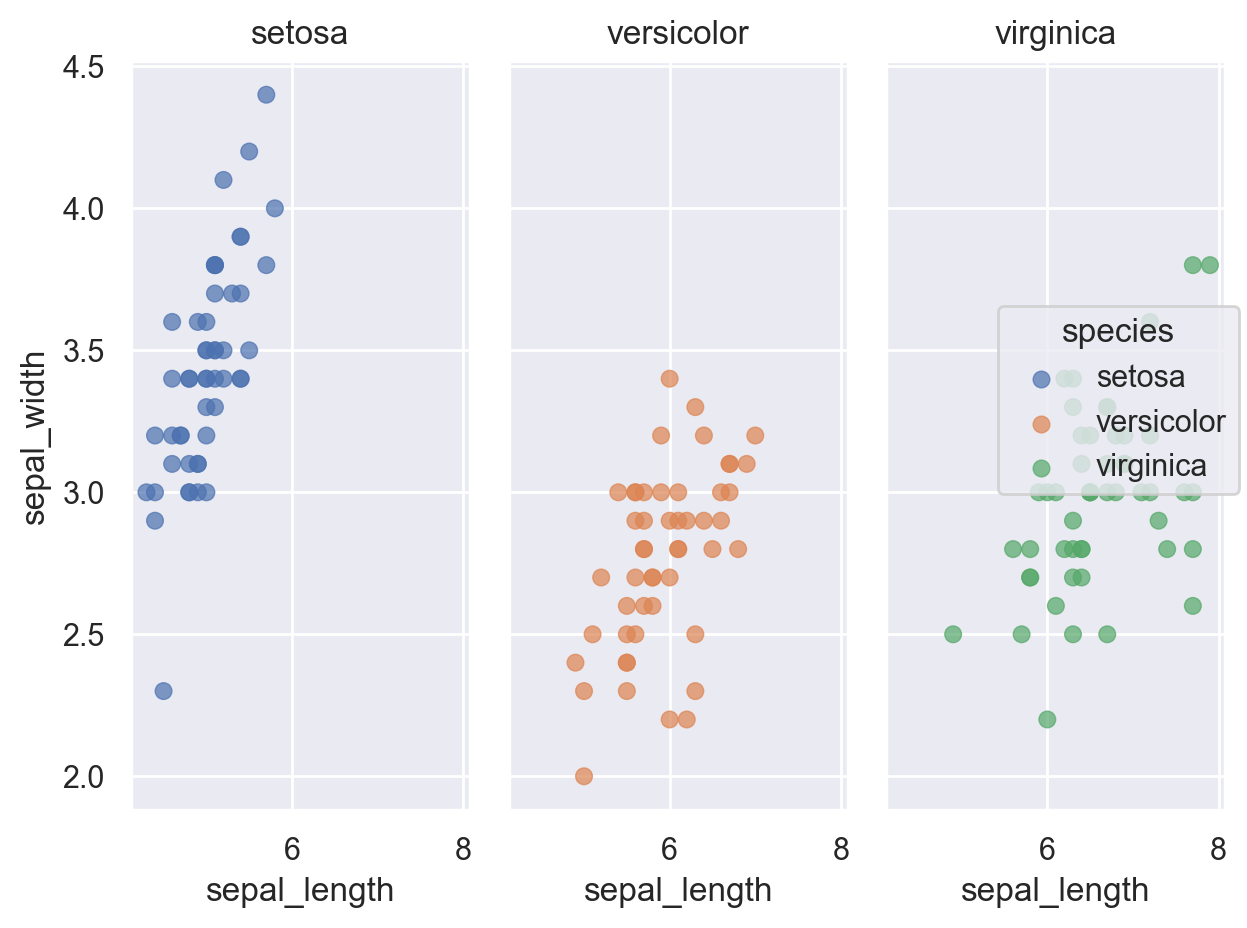

In [4]:
g2 = so.Plot(iris, x = "sepal_length", y = "sepal_width").facet("species").add(so.Dot(alpha = 0.7), color = "species")
g2.show()

### Chia nhóm dữ liệu

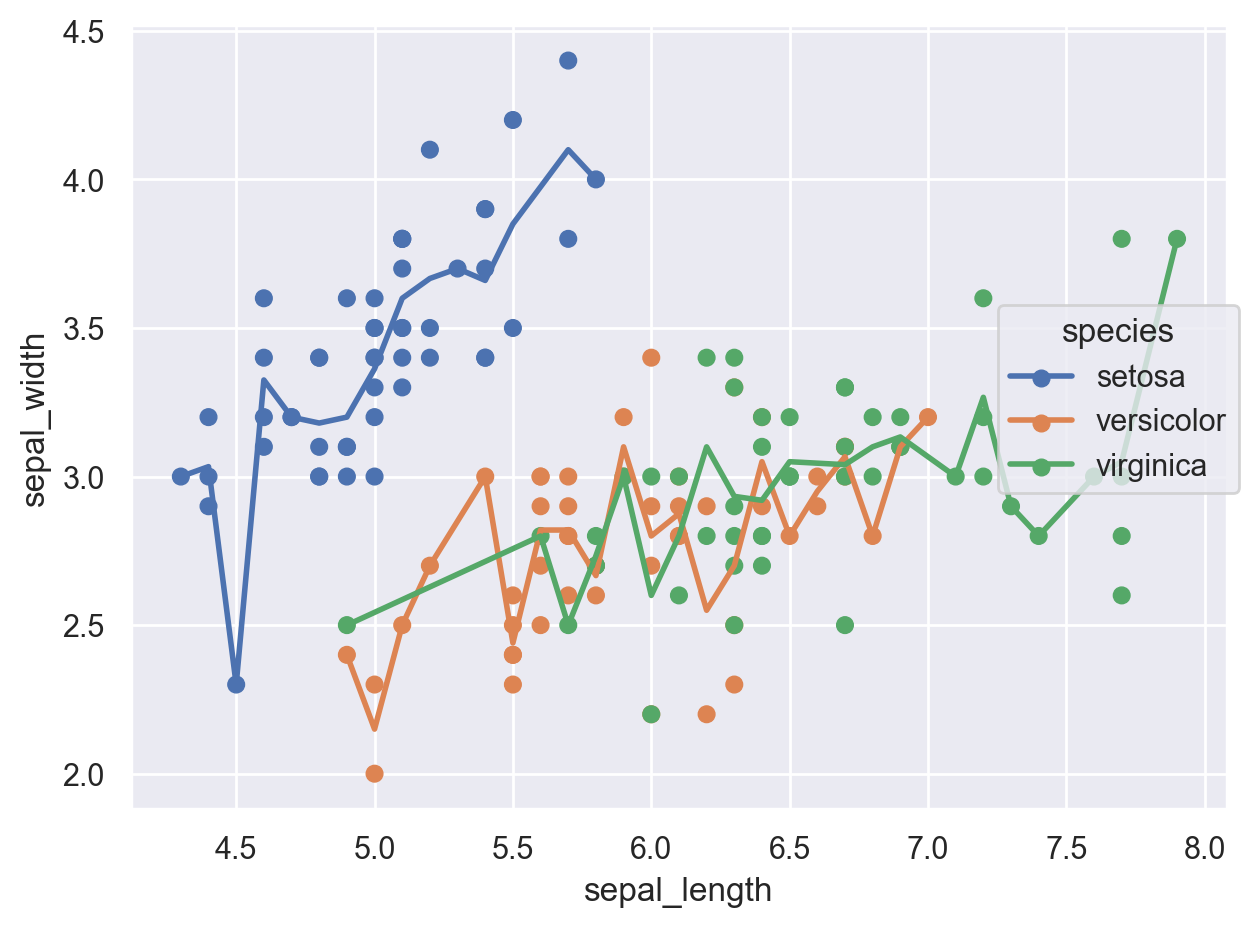

In [5]:
g3 = so.Plot(iris, x = "sepal_length", y = "sepal_width", color = "species").add(so.Line(linewidth = 2), so.Agg()).add(so.Dot())
g3.show()

### Scale

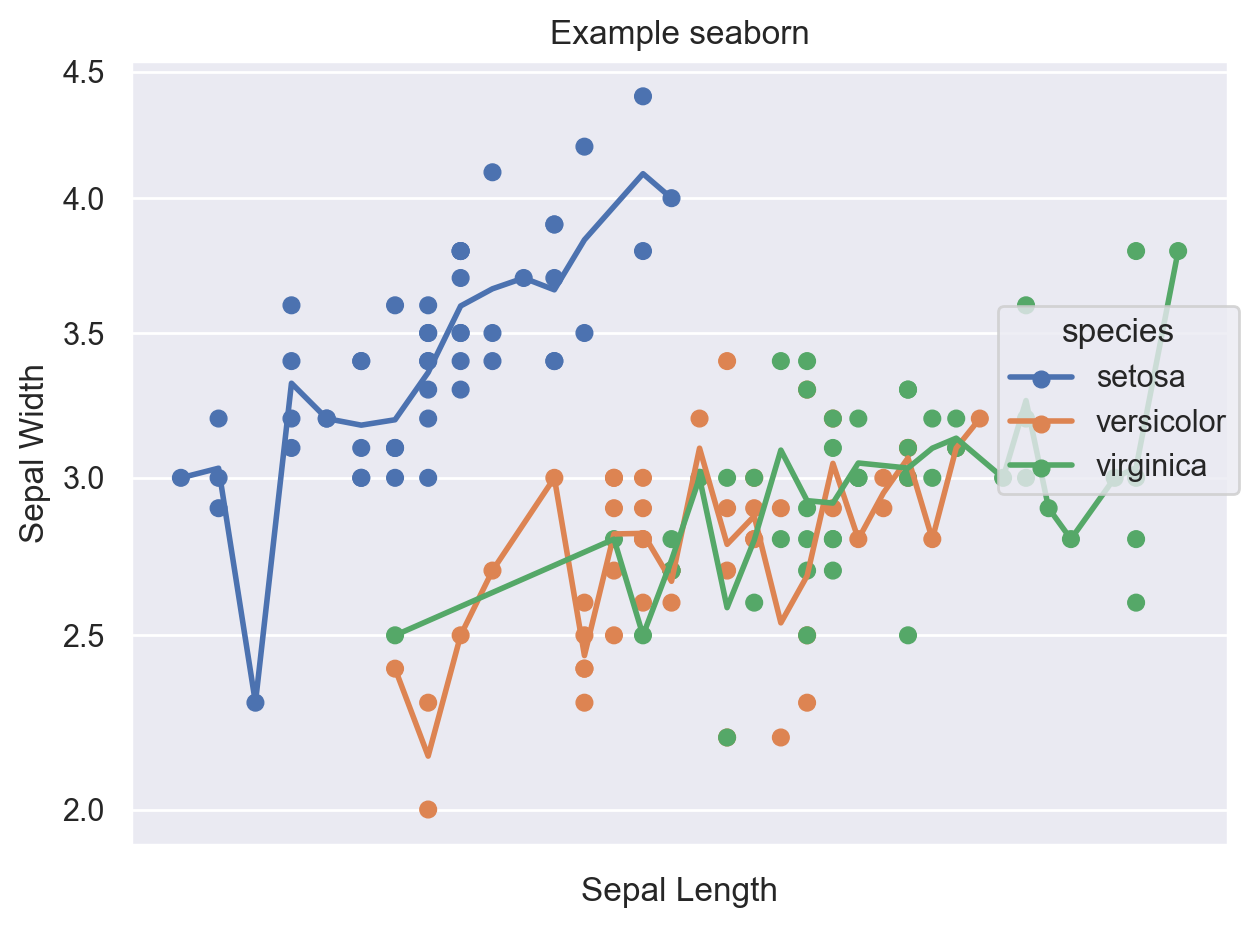

In [6]:
g4 = g3.scale(x = "log", y = "sqrt").label(title = "Example seaborn", x = "Sepal Length", y = "Sepal Width")
g4.label(color = "")
g4.show()

### Histogram & Density

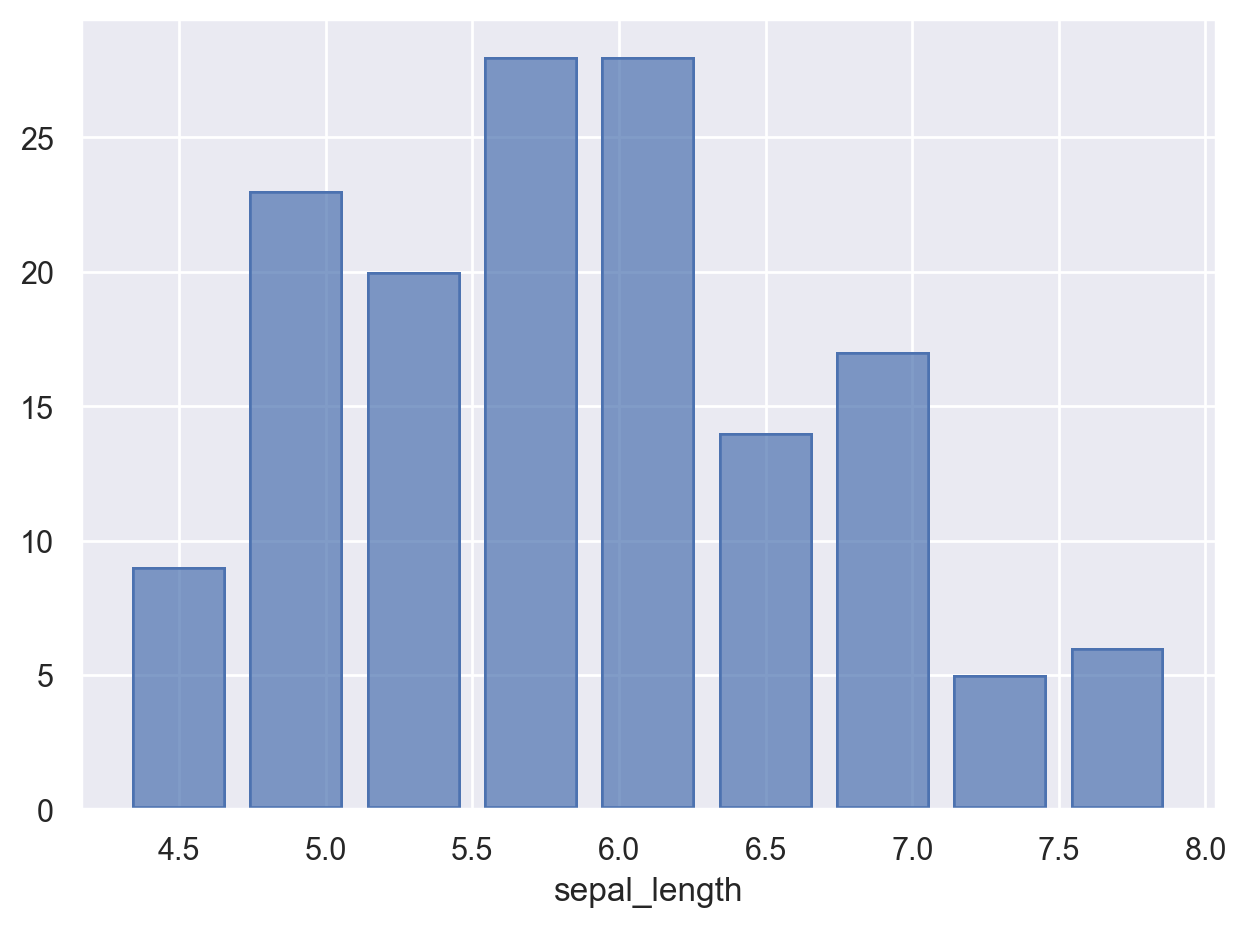

In [7]:
g5 = so.Plot(iris, "sepal_length").add(so.Bar(),so.Hist())
g5.show()

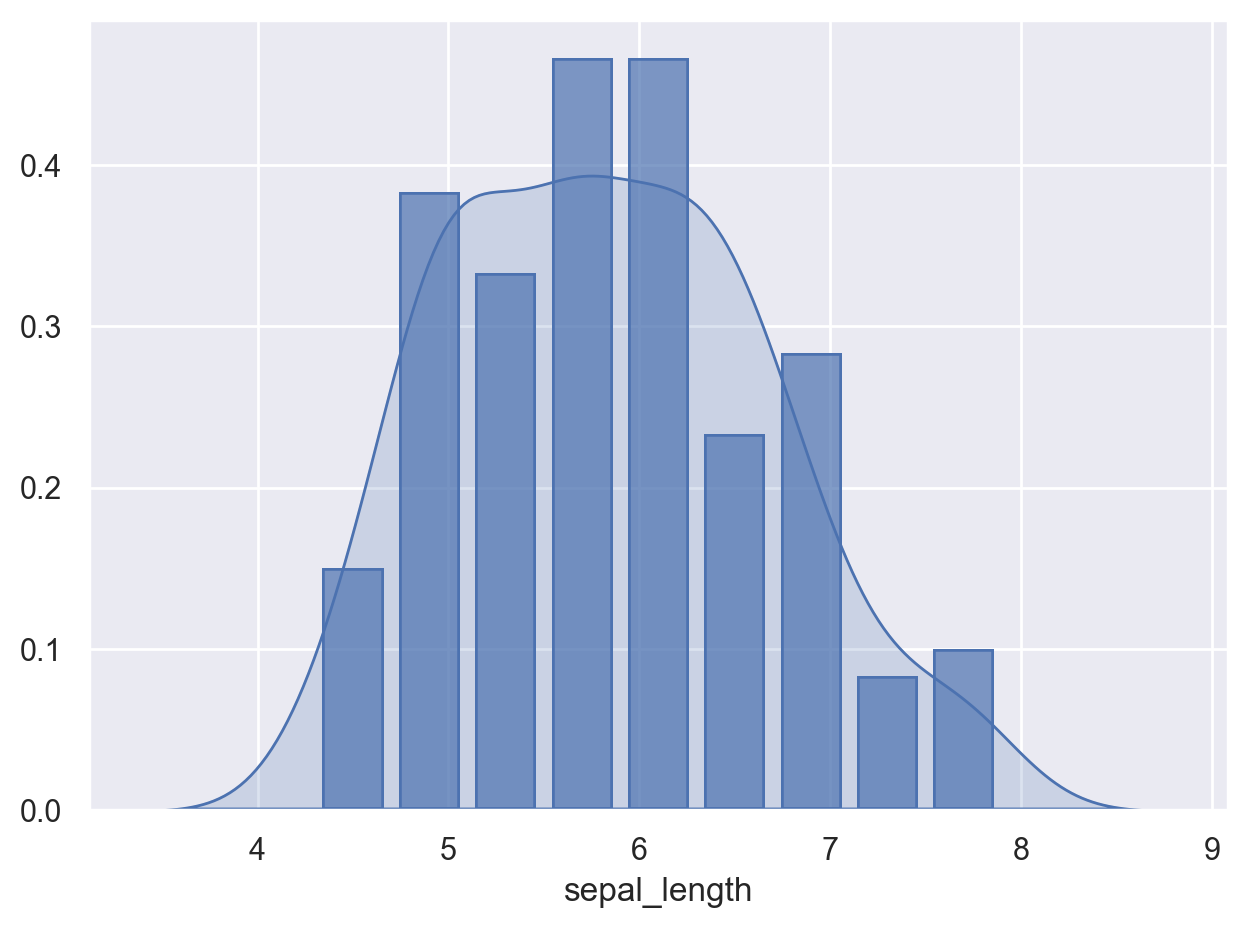

In [8]:
g6 = so.Plot(iris, "sepal_length").add(so.Bar(),so.Hist("density")).add(so.Area(), so.KDE())
g6.show()

## Các biểu đồ dạng khác

In [9]:
titanic = pd.read_csv("./99_dataset/titanic.csv")
tips = pd.read_csv("./99_dataset/tips.csv")

In [10]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Scatterplot

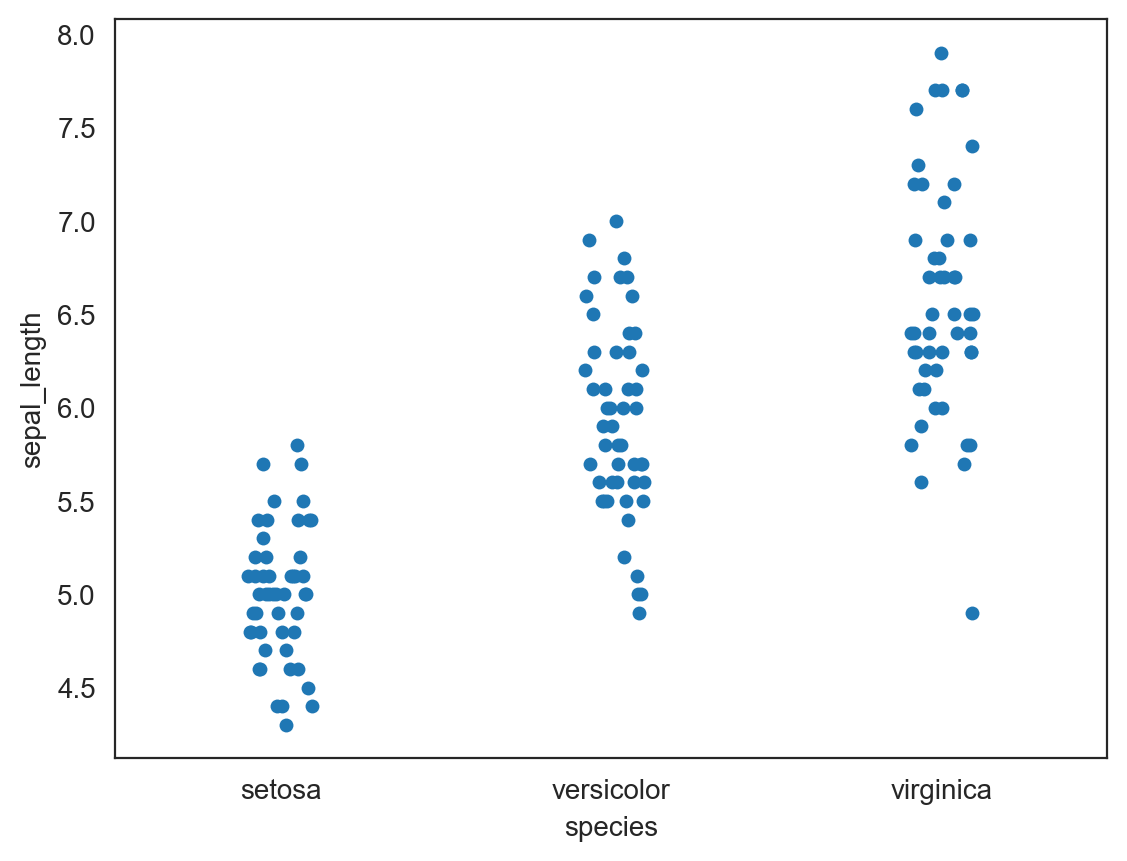

In [11]:
p = sns.stripplot(x = "species", y = "sepal_length", data = iris)
plt.show(p)

### Point plot

In [12]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


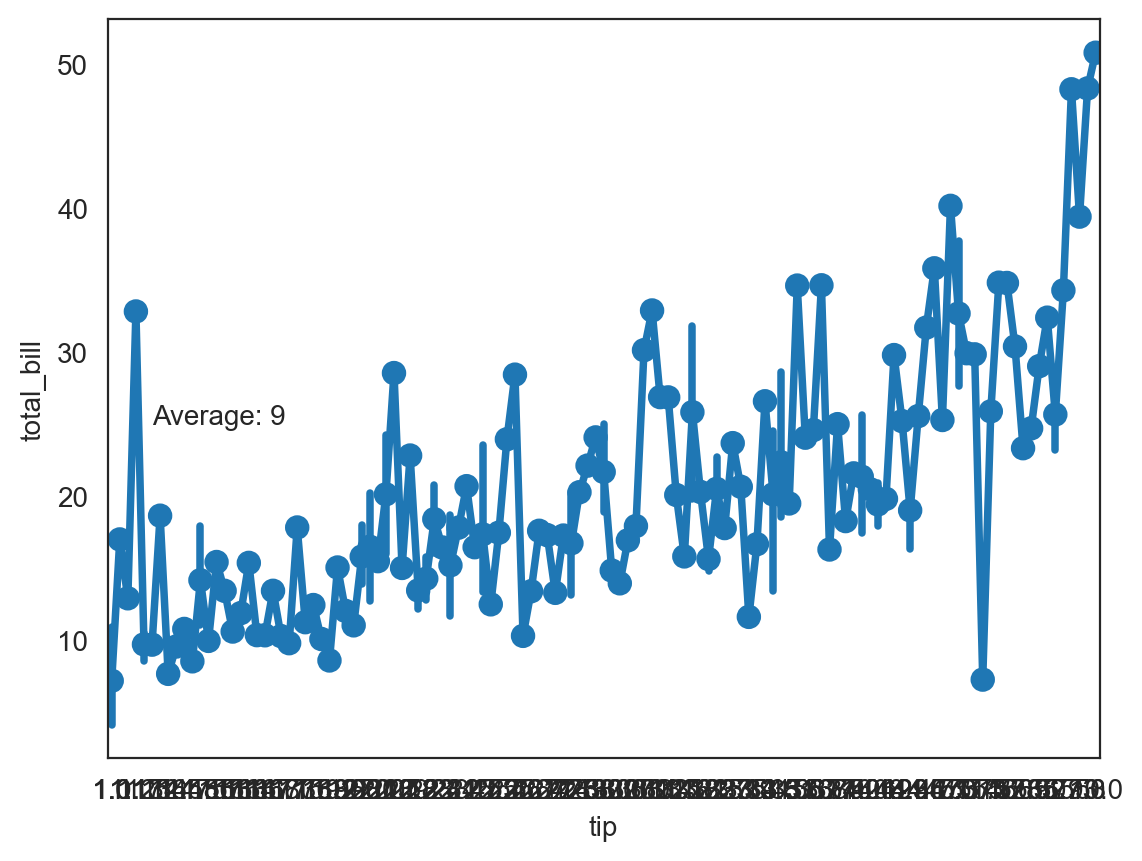

In [13]:
sns.pointplot(x="tip", y="total_bill", data=tips)
# Add thêm annotate
plt.annotate('Average: 9', xy = (5, 25))
plt.show()

### Histogram & density

C:\Users\anhhd3\AppData\Local\Temp\ipykernel_12492\1221992167.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris['sepal_length'])
C:\Users\anhhd3\AppData\Local\Temp\ipykernel_12492\1221992167.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris['sepal_width'])


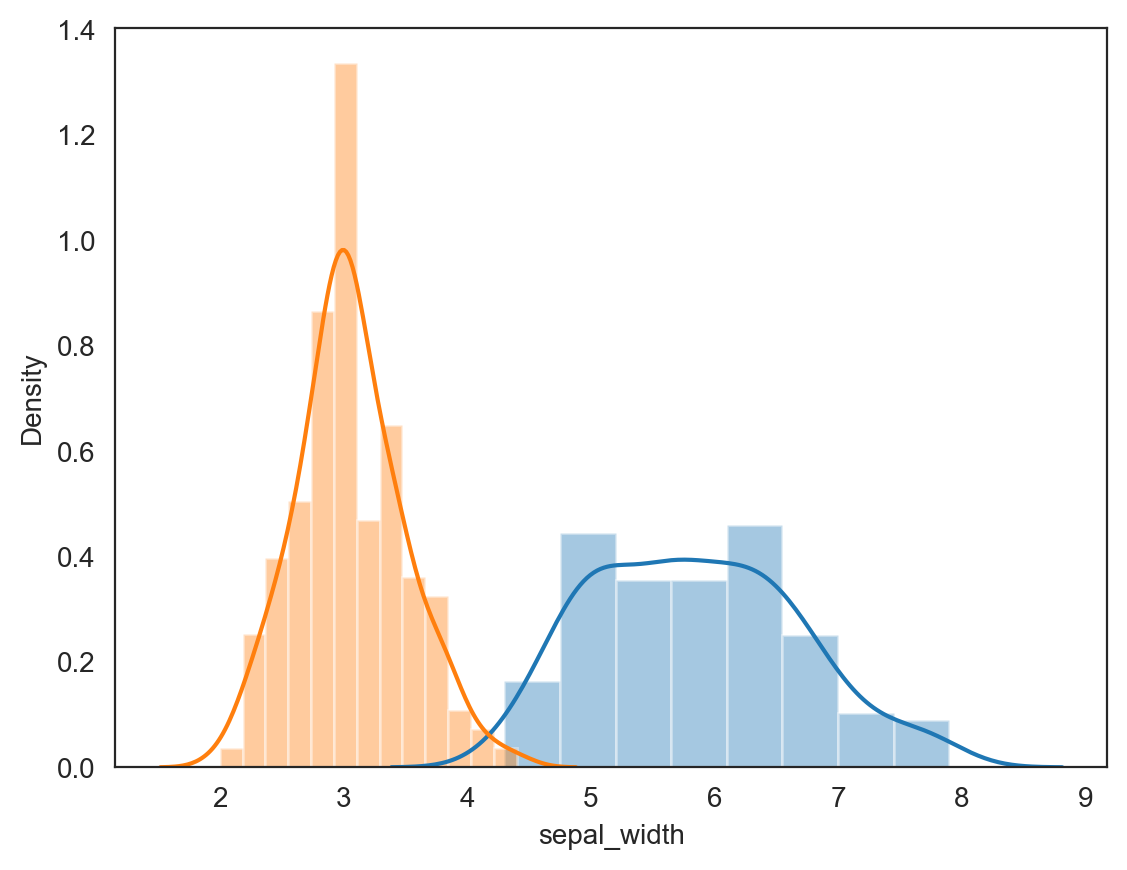

In [14]:
sns.distplot(iris['sepal_length'])
sns.distplot(iris['sepal_width'])
plt.show()

### Kernel density

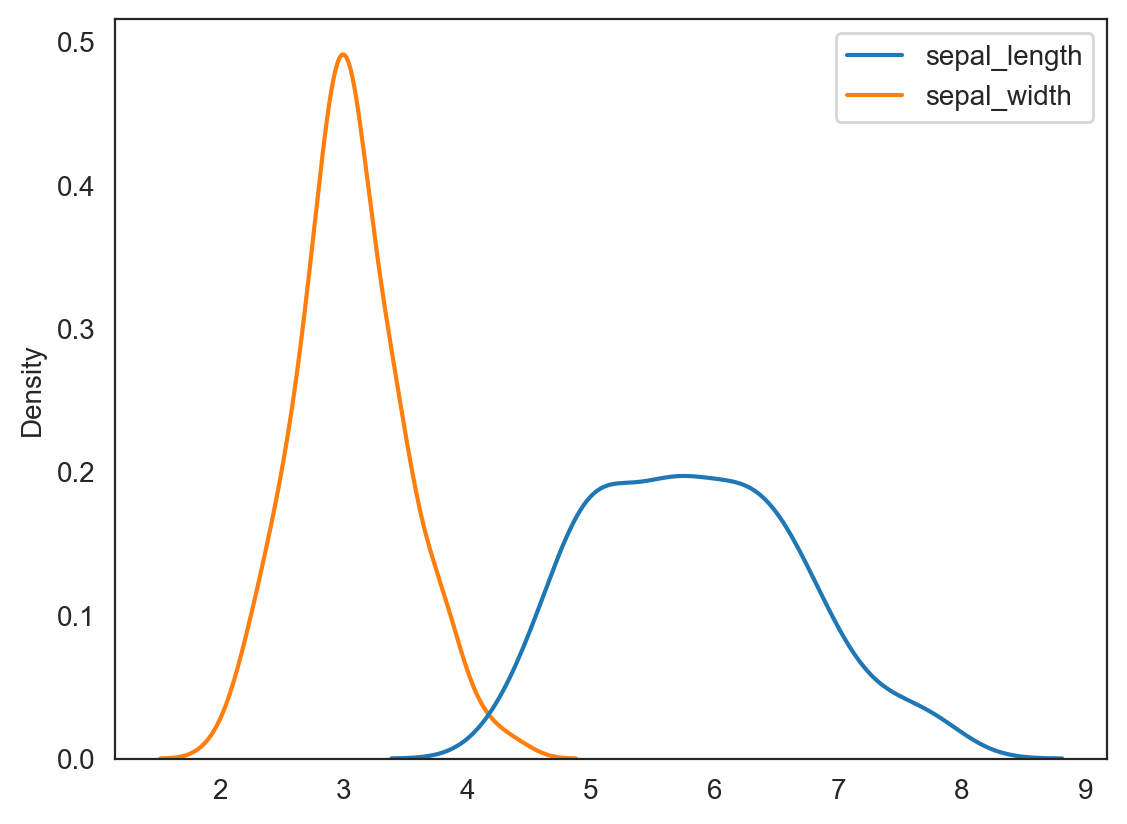

In [15]:
kde_plot = sns.kdeplot(iris[iris.columns[0:2]])
plt.show(kde_plot)

### Joint plot

In [16]:
# Joint plot
with sns.axes_style("white"):
    sns.jointplot('sepal_length', 'sepal_width', iris, kind = "kde")

TypeError: jointplot() takes from 0 to 1 positional arguments but 3 positional arguments (and 1 keyword-only argument) were given

In [ ]:
# Joint plot
with sns.axes_style("white"):
    sns.jointplot('sepal_length', 'sepal_width', iris, kind = "hex")

## Pair plot

In [ ]:
sns.pairplot(iris,
            hue = 'species') # Chia nhóm

## Facet

`seaborn` hỗ trợ hệ thống facet

In [ ]:
tips = pd.read_csv("./99_dataset/tips.csv")

In [ ]:
tips.head()

In [ ]:
# Chưa chia facet
plt.hist(tips['total_bill'])

In [ ]:
# Chia facet
grid = sns.FacetGrid(tips, row = "time", col = "sex")
grid.map(plt.hist, 'total_bill')

In [ ]:
# Chia facet
grid = sns.FacetGrid(tips, row = "time", col = "sex")
grid.map(sns.distplot, "total_bill")

## Category plot

### Factor plot

In [ ]:
with sns.axes_style(style = "ticks"):
    g = sns.factorplot("day", "total_bill", "sex", data = tips, kind = "box")
    g.set_axis_labels("Days", "Bill")

In [ ]:
tips.head()

In [ ]:
# Boxplot
sns.axes_style('ticks')
my_plot = sns.boxplot(data = tips, x = "day", y = "total_bill", hue = "sex")

In [ ]:
# Chuyển legend lên trên figure
my_plot.legend(loc='upper center', ncol = 2, bbox_to_anchor=(0.5, 1.1))

In [ ]:
my_plot.get_figure()

### Barplot

In [ ]:
sns.factorplot("day", data = tips, kind = "count")

## Tùy chỉnh các thành phần

In [ ]:
sns.set_style('ticks')
p = sns.stripplot("sepal_length", "sepal_width", hue = "species", data = iris)
# Add title, name
p.set(xlabel = "X", ylabel = "Y", title = "My chart")
# Scale y
p.set_yscale('log')
# Loại bỏ trục trên
sns.despine()
# Legend
plt.legend(loc = "lower center",
          frameon = True, # Giữ frame
          ncol= 3)
# Lưu thành object
p_chart = p.get_figure()

In [ ]:
p_chart.savefig('chart.png', dpi = 400)

## Lưu ý khác

**Lưu ý**: `seaborn` không áp dụng chain method một cách đơn giản giống pandas được

In [ ]:
with sns.axes_style("ticks"):
    p = sns.boxplot("sex", "total_bill", hue = "smoker", data = tips)
    # Thêm title
    # Điều chỉnh tên trục
    p.set(xlabel = "Gender", ylabel = "Amount", title = "My chart")
    sns.despine()
    p.legend(loc = 'upper center', ncol = 2, bbox_to_anchor = (0.5, 1.02))
    #plt.savefig("seaborn_chart.png")
    boxplot = p.get_figure()

**Lưu lại biểu đồ**

```python
boxplot.savefig("boxplot.png")
```

#### Chia facet

Tương tự như `matplotlib`, `seaborn` cần được sử dụng kèm với `map` để chia thành hệ thống `facet`

In [ ]:
import matplotlib.pyplot as plt
g=sns.FacetGrid(data=tips,col='sex')
g.map(sns.regplot,'total_bill','tip')

## Tài liệu tham khảo

- [https://seaborn.pydata.org/tutorial.html](https://seaborn.pydata.org/tutorial.html)
